## 1.Packages

In [3]:
### 1.1.Install

In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


### 1.2.Import

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import pyreadstat
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, LeaveOneOut, train_test_split 
from scipy import stats

## 2.Data

### 2.1.Load Data

In [10]:
# read data
df = pd.DataFrame(pd.read_spss("../data/secom_mod.sav"))
df = df.set_index('ID')
df.shape

(1567, 592)

In [11]:
df.head()

,class,timestamp,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
ID,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,19/07/2008 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
2.0,0.0,19/07/2008 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
3.0,1.0,19/07/2008 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
4.0,0.0,19/07/2008 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
5.0,0.0,19/07/2008 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


### 2.2.Change "class" feature Type and Values

In [12]:
df.dtypes

class         float64
timestamp      object
feature001    float64
feature002    float64
feature003    float64
               ...   
feature586    float64
feature587    float64
feature588    float64
feature589    float64
feature590    float64
Length: 592, dtype: object

In [13]:
dict_temp = {0:'pass' ,1:'fail'}
df['class'] = df['class'].map(dict_temp)

In [47]:

#
import plotly.express as px

fig = px.pie(
    df['class'].value_counts(),
    values=['pass','fail'],
    names=["PASS", "FAIL"],
    title="Class Distribution",
    width=500
)

fig.show()

In [15]:
df['class'].value_counts()

pass    1472
fail      95
Name: class, dtype: int64

In [16]:
df.dtypes

class          object
timestamp      object
feature001    float64
feature002    float64
feature003    float64
               ...   
feature586    float64
feature587    float64
feature588    float64
feature589    float64
feature590    float64
Length: 592, dtype: object

### 2.3.Drop timestamp

In [17]:
df = df.drop(columns='timestamp')

### 2.4.Splitting Traninig and Test Data 

In [18]:
y = df['class']
x = df.drop('class', axis=1)

In [19]:
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size=0.2, random_state=40, shuffle=True, stratify=y)

## 3.Feature Removal

### 3.1.Constant

In [20]:
x_train.shape

(1253, 590)

In [21]:
len(x_train[x_train.columns[x_train.nunique() == 1]].columns)

116

In [22]:
x_train.drop(list(x_train[x_train.columns[x_train.nunique() == 1]].columns), axis = 1, inplace = True)

C:\Users\fjorg\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
x_train.shape

(1253, 474)

### 3.2.With more than 55% Na

In [24]:
feature_na_sum = pd.DataFrame((x_train.isna()).sum())
feature_na_55 = feature_na_sum[feature_na_sum[0]>=(len(x_train.loc[:,])*55/100)].index
len(feature_na_55)

24

In [25]:
x_train.drop(feature_na_55, axis = 1, inplace = True)

C:\Users\fjorg\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 3.3.least volatile

In [26]:
x_train

,feature001,feature002,feature003,feature004,feature005,feature007,feature008,feature009,feature010,feature011,...,feature577,feature578,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
ID,,,,,,,,,,,,,,,,,,,,,
567.0,3023.07,2484.55,2242.8555,1430.7270,0.8832,106.2100,0.1216,1.5613,-0.0028,0.0008,...,1.1395,17.5289,0.4979,0.0165,0.0041,3.3098,0.0184,0.0127,0.0037,68.7057
1261.0,2953.63,2384.04,2191.2111,1437.5003,2.2073,97.6444,0.1235,1.3584,-0.0024,-0.0048,...,86.7573,91.1106,0.4968,0.0188,0.0041,3.7853,0.0137,0.0326,0.0108,237.4625
1041.0,3021.61,2440.29,2227.2222,2043.5876,1.1892,95.5267,0.1253,1.5335,-0.0083,-0.0095,...,1.5180,16.7005,0.5091,0.0123,0.0031,2.4116,0.0437,0.0200,0.0074,45.7019
1181.0,3093.46,2479.17,2221.3667,2490.6947,1.2667,88.6578,0.1220,1.3537,0.0134,-0.0039,...,1.4926,14.3055,0.5006,0.0148,0.0036,2.9659,0.0190,0.0150,0.0045,78.6525
611.0,3010.40,NaN,2172.4000,1148.4101,1.2614,102.4522,0.1227,1.3843,-0.0010,-0.0004,...,1.6264,23.2761,0.5015,0.0137,0.0034,2.7339,0.0252,0.0157,0.0046,62.3881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806.0,2952.31,2453.53,2188.7222,1325.5230,1.1721,105.1700,0.1250,1.4480,-0.0233,0.0087,...,1.7048,16.6976,0.4949,0.0155,0.0034,3.1238,0.0253,0.0058,0.0018,22.7661
1101.0,2880.58,2489.76,2256.6000,2365.4787,1.1384,85.4278,0.1205,1.6114,0.0484,0.0043,...,1.6892,14.6674,0.5032,0.0117,0.0029,2.3282,0.0398,0.0202,0.0076,50.7949
1469.0,2968.78,2451.53,2207.1000,1298.4309,1.0251,96.9478,0.1203,1.3985,-0.0105,-0.0140,...,1.3708,18.3819,0.4972,0.0133,0.0036,2.6718,0.0167,0.0310,0.0084,185.3578


In [27]:
summary = x_train.iloc[:,1:].describe(include='all')
summary

,feature002,feature003,feature004,feature005,feature007,feature008,feature009,feature010,feature011,feature012,...,feature577,feature578,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
count,1247.000000,1242.000000,1242.000000,1242.000000,1242.000000,1248.000000,1252.000000,1252.000000,1252.000000,1252.000000,...,1253.000000,1253.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000
mean,2495.654419,2200.025057,1392.454440,4.017364,101.174591,0.121789,1.462431,-0.000561,0.000013,0.964206,...,5.681953,16.727285,0.499998,0.015465,0.003880,3.099220,0.021644,0.016262,0.005218,98.992713
std,80.939817,29.195659,445.082171,54.595810,6.187379,0.009346,0.073497,0.015345,0.009408,0.013113,...,17.185851,12.710672,0.003442,0.019044,0.004134,3.969263,0.012636,0.008377,0.002746,94.999511
min,2158.750000,2060.660000,0.000000,0.681500,82.131100,0.000000,1.191000,-0.053400,-0.034900,0.655400,...,0.663600,5.098600,0.477800,0.006000,0.001700,1.197500,-0.006000,0.003200,0.001000,0.000000
25%,2452.000000,2180.986050,1081.822175,1.005075,97.954450,0.121100,1.411250,-0.010800,-0.005600,0.958000,...,1.412900,11.551000,0.497800,0.011600,0.003100,2.323775,0.013500,0.010600,0.003300,44.235500
50%,2498.300000,2200.233300,1281.786200,1.317100,101.599450,0.122400,1.461950,-0.001000,0.000400,0.965800,...,1.631200,13.794100,0.500000,0.013800,0.003600,2.761900,0.020700,0.014800,0.004600,71.010800
75%,2538.745000,2217.811100,1588.509000,1.525700,104.623925,0.123800,1.516825,0.008650,0.005700,0.971325,...,1.904500,17.053400,0.502200,0.016500,0.004100,3.296275,0.027600,0.020300,0.006400,114.287800
max,2846.440000,2315.266700,3715.041700,1114.536600,129.252200,0.128600,1.653900,0.074900,0.053000,0.984600,...,90.423500,96.960100,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


In [28]:
feature_std = pd.DataFrame(summary.loc['std',:])
feature_coeffstd = pd.DataFrame(abs(summary.loc['mean',:])/summary.loc['std',:])

In [29]:
print(min(feature_std.iloc[:,0]))
print(max(feature_std.iloc[:,0]))

0.0001055328779148529
6438.937158652618


In [30]:
print(min(feature_coeffstd.iloc[:,0]))
print(max(feature_coeffstd.iloc[:,0]))

0.001409271870062433
432.6230095243187


In [31]:
feature_coeffstd_sort = feature_coeffstd.sort_values(by=[0])

<AxesSubplot:>

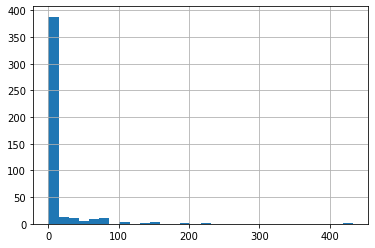

In [32]:
feature_coeffstd_sort.iloc[:,0].hist(bins=30)

<AxesSubplot:>

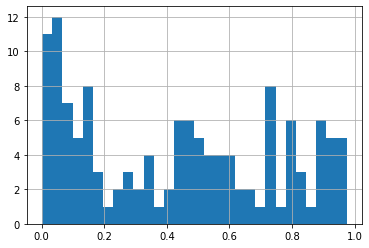

In [33]:
feature_coeffstd_sort.iloc[0:130,0].hist(bins=30)

In [34]:
feature_index = feature_coeffstd_sort.index

In [35]:
feature_least_volatiles = []
for i in range(0,len(feature_index)) :
    if i <= round(len(feature_coeffstd_sort)*0.05,0): 
        feature_least_volatiles.append(feature_index[i])

In [36]:
len(feature_least_volatiles)

23

In [37]:
feature_least_var = []
for i in range(0,len(feature_index)) :
    if feature_coeffstd_sort.iloc[i,0] <= 1 : 
        feature_least_var.append(feature_index[i])

In [38]:
len(feature_least_var)

135

In [39]:
#we can decide to use "feature_least_volatiles" or "feature_least_var" to drop features
x_train.drop(feature_least_volatiles, axis = 1, inplace = True)

C:\Users\fjorg\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
x_train.shape

(1253, 427)

## 4.Outlier Identification

In [41]:
z_x_train= pd.DataFrame(stats.zscore(x_train,nan_policy='omit'))

In [42]:
z_x_train

,0,1,2,3,4,5,6,7,8,9,...,417,418,419,420,421,422,423,424,425,426
0,0.122233,-0.137249,1.467605,0.086025,-0.057430,0.814147,-0.020251,1.345737,0.174988,-0.747087,...,-0.264419,0.063091,-0.609761,0.054366,0.053153,0.053074,-0.256815,-0.425326,-0.553038,-0.318940
1,-0.820960,-1.379534,-0.302014,0.101249,-0.033167,-0.570777,0.183135,-1.416011,0.838722,-0.137567,...,4.719447,5.854373,-0.929500,0.175189,0.053153,0.172917,-0.628903,1.951141,2.033549,1.458167
2,0.102402,-0.684294,0.931923,1.463540,-0.051823,-0.913176,0.375816,0.967340,0.304684,-0.478078,...,-0.242386,-0.002108,2.645764,-0.166269,-0.188836,-0.173306,1.746129,0.446444,0.794901,-0.561183
3,1.078329,-0.203744,0.731281,2.468494,-0.050403,-2.023770,0.022567,-1.479985,0.579332,-0.209511,...,-0.243865,-0.190608,0.175053,-0.034939,-0.067842,-0.033602,-0.209314,-0.150659,-0.261592,-0.214194
4,-0.049862,NaN,-0.946585,-0.548534,-0.050500,0.206569,0.097498,-1.063477,0.380975,-0.518565,...,-0.236076,0.515428,0.436658,-0.092724,-0.116240,-0.092074,0.281526,-0.067064,-0.225161,-0.385468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,-0.838890,-0.520650,-0.387298,-0.150441,-0.052136,0.645995,0.343702,-0.196432,0.922643,1.106055,...,-0.231513,-0.002336,-1.481777,0.001834,-0.116240,0.006195,0.289443,-1.249326,-1.245223,-0.802710
1249,-1.813187,-0.072854,1.938567,2.187048,-0.052754,-2.546011,-0.138001,2.027666,1.113371,-0.541730,...,-0.232421,-0.162124,0.930800,-0.197788,-0.237234,-0.194325,1.437375,0.470328,0.867763,-0.507551
1250,-0.615180,-0.545370,0.242426,-0.211335,-0.054830,-0.683406,-0.159410,-0.870195,-0.069144,-0.913816,...,-0.250955,0.130227,-0.813231,-0.113737,-0.067842,-0.107726,-0.391400,1.760068,1.159209,0.909474
1251,-0.756306,-0.205969,1.094115,-0.466076,-0.054908,0.219860,-0.277159,0.349384,-1.167737,-0.270124,...,-0.258033,-0.812900,0.698263,-0.019179,-0.019444,-0.022890,-1.982671,-0.831355,-0.808054,1.825528


In [43]:
i = 0
for a in range(0,len(z_x_train.iloc[:,0])) :
    for b in range(0,len(z_x_train.iloc[0,:])) :
        if np.abs(z_x_train.iloc[a,b])>3 :
            i = i+1

In [44]:
print(i)

4786


In [45]:
for a in range(0,len(z_x_train.iloc[:,0])) :
    for b in range(0,len(z_x_train.iloc[0,:])) :
        if np.abs(z_x_train.iloc[a,b])>3 :
            s=np.std(x_train.iloc[:,b])
            m=np.mean(x_train.iloc[:,b])
            if z_x_train.iloc[a,b] > 0 :
                x_train.iloc[a,b]=3*s + m
            else:
                x_train.iloc[a,b]=3*s - m

C:\Users\fjorg\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\fjorg\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

